# Análisis Exploratório de Datos (EDA)

### Importación de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install sweetviz
import sweetviz as sv

C:\Users\Natalya\anaconda3\envs\entorno_ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Carga del dataset

In [2]:
# defino la URL del dataset
csv_url = "https://raw.githubusercontent.com//ITACADEMYprojectes//projecteML//main//bank_dataset.CSV"

df = pd.read_csv(csv_url)

### Información sobre el dataset

In [3]:
# las primeras cinco filas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# información general 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


Tenemos un total de 11162 filas y 17 columnas. 

#### Variables numéricas

In [5]:
# descripción estadística de las variables numéricas
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Al observar los estadísticos descriptivos, vemos que hay ciertas variables numéricas que tienen mucha dispersión, como por ejemplo `balance`, `duration` y `pdays`. 

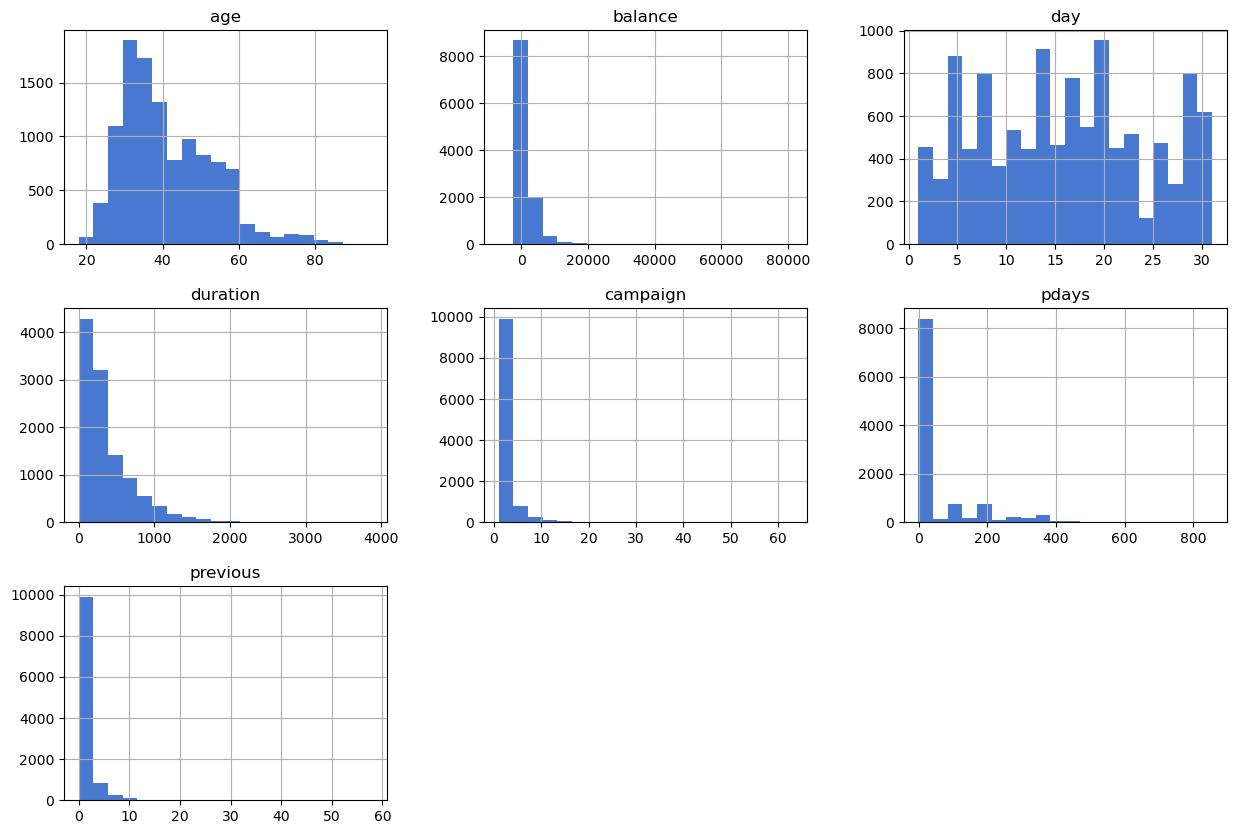

In [6]:
# representación de la distribución de las variables numéricas en un histograma
plt.style.use('seaborn-v0_8-muted')
df.hist(bins=20, figsize=(15, 10))
plt.show()

#### Variables categóricas

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"La variable {column.upper()} tiene categorias: {df[column].nunique()}\
    \n{df[column].value_counts()}\
    \n \n------------------------\n")

La variable JOB tiene categorias: 12    
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64    
 
------------------------

La variable MARITAL tiene categorias: 3    
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64    
 
------------------------

La variable EDUCATION tiene categorias: 4    
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64    
 
------------------------

La variable DEFAULT tiene categorias: 2    
default
no     10994
yes      168
Name: count, dtype: int64    
 
------------------------

La variable HOUSING tiene categorias: 2    
housing
no     5881
yes    5281
Name: count, dtype: int64    
 
------------------------

La variable LOAN

Algunas variables categóricas tienen categoría *unknown*, como por ejemplo `job`, `education`, `contact` y `poutcome`. De ellas, las variables que me interesan para mi proyecto son `job` y `education`, y sería interesante averiguar el por qué hay clientes en esta categoría desconocida, para ver si puedo imputar valores o si es mejor dejarlos como una categoría separada.

### Detección y gestión de valores faltantes y filas duplicadas

In [8]:
# verifico cuántas filas duplicadas hay
df.duplicated().sum()

0

No tenemos ningun duplicado, es decir, cada fila corresponde a los datos de un cliente del banco.

In [9]:
# verifico la presencia de valores null
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Hay tres columnas que contienen valores *null*: `age`, `marital` y `education`. 

En total tenemos 22 valores *null*, que representan menos del 1% del total de los registros. Sin embargo, tenía pensado utilizar esas tres variables para mi proyecto, así que procederé a sustituir los valores faltantes. 

In [10]:
# filtro los registros que contienen valores null
filtros = df['age'].isnull() | df['marital'].isnull() | df['education'].isnull()
df[filtros]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1088,53.0,management,NaN,secondary,no,1004,no,yes,telephone,22,dec,119,1,-1,0,unknown,yes
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1300,37.0,technician,married,NaN,no,549,no,no,cellular,2,mar,239,1,-1,0,unknown,yes
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
2943,24.0,student,single,NaN,no,382,no,no,cellular,13,nov,256,2,92,3,failure,yes
3719,68.0,retired,NaN,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
4019,NaN,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
4737,37.0,management,single,NaN,no,102,yes,no,cellular,6,may,445,1,258,2,failure,yes
4854,34.0,management,NaN,tertiary,no,5,no,no,cellular,18,aug,370,2,-1,0,unknown,yes
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no


Dado que los valores que faltan estan relacionados con los datos demográficos de los clientes, puedo utilizar el resto de datos disponibles como guía para imputar los faltantes: 
* `age`: mediana de edad de clientes con el mismo trabajo, estado civil y educación
* `marital`: moda de estado civil de clientes con el mismo trabajo y edad
* `education`: moda de educación de clientes con el mismo trabajo y edad

In [11]:
# sustituir 'age'
median_age = df.groupby(['job', 'marital','education'])['age'].transform(lambda x: x.median() if not x.isnull().all() else None)
df['age'] = df['age'].fillna(round(median_age))

In [12]:
# sustituir 'marital'
mode_marital = df.groupby(['job', 'age'])['marital'].transform(lambda x: x.mode()[0] if not x.isnull().all() else None)
df['marital'] = df['marital'].fillna(mode_marital)

In [13]:
# sustituir 'education'
mode_education = df.groupby(['job', 'age'])['education'].transform(lambda x: x.mode()[0] if not x.isnull().all() else None)
df['education'] = df['education'].fillna(mode_education)

In [14]:
# verifico nuevamente la presencia de valores null
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Se han imputado correctamente todos los valores faltantes, siguiendo la estrategia explicada. 

EXTRA: La variable edad está definida como número decimal y tiene el tipo de dato float. Sin embargo, no tiene sentido que la edad de las personas contenga decimales, así que modifico el tipo de dato.

In [15]:
# modifico dtype float a integer
df['age'] = df['age'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int32 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int32(1), int64(6), object(10)
memory usage: 1.4+ MB


### Detección y gestión de *outliers*

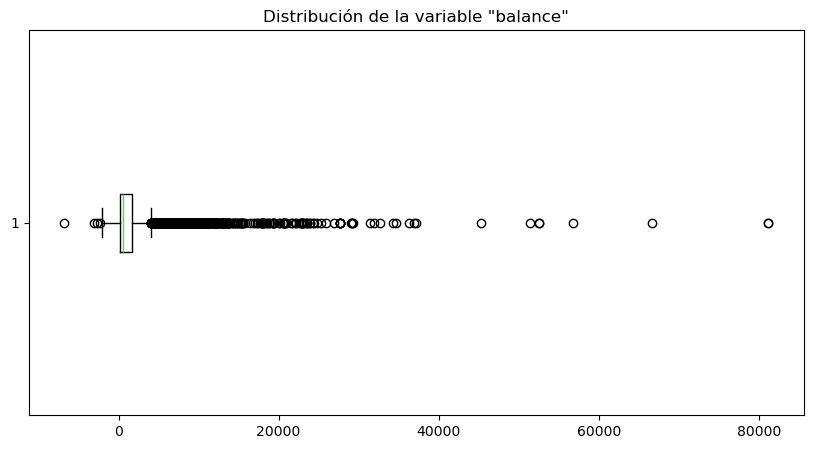

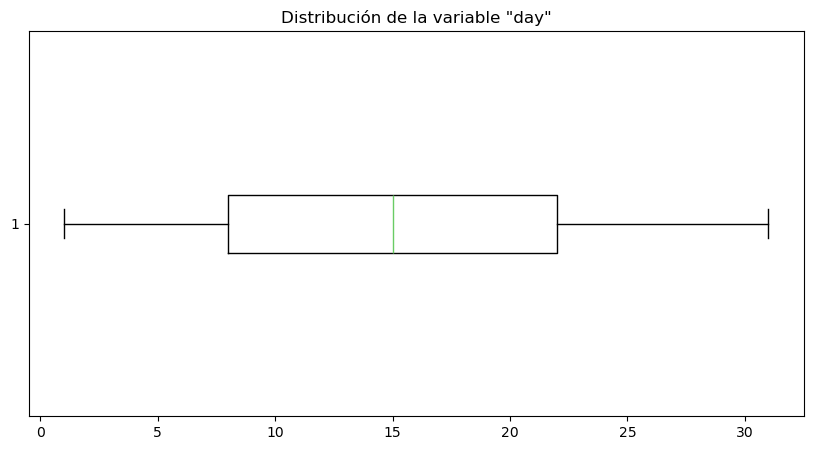

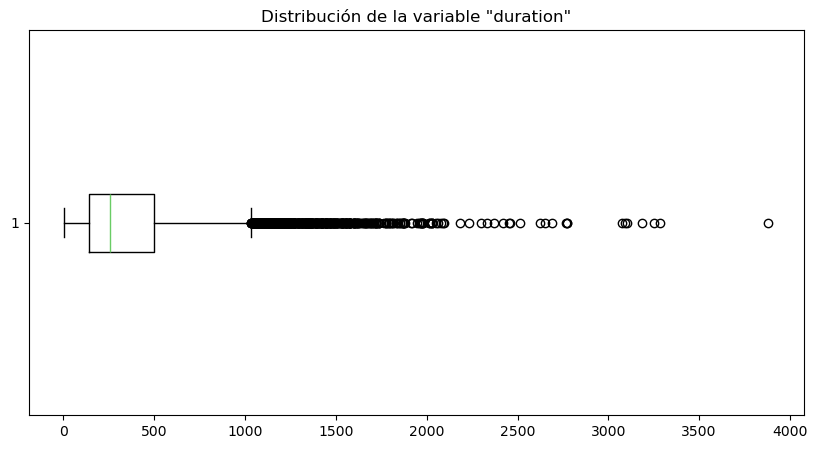

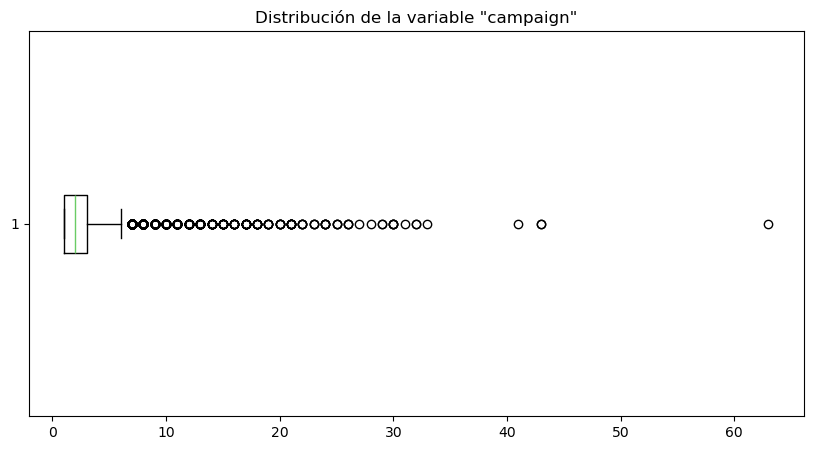

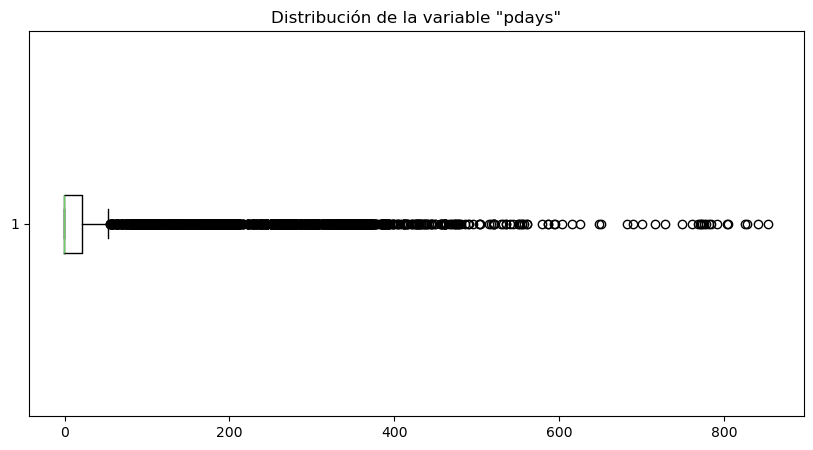

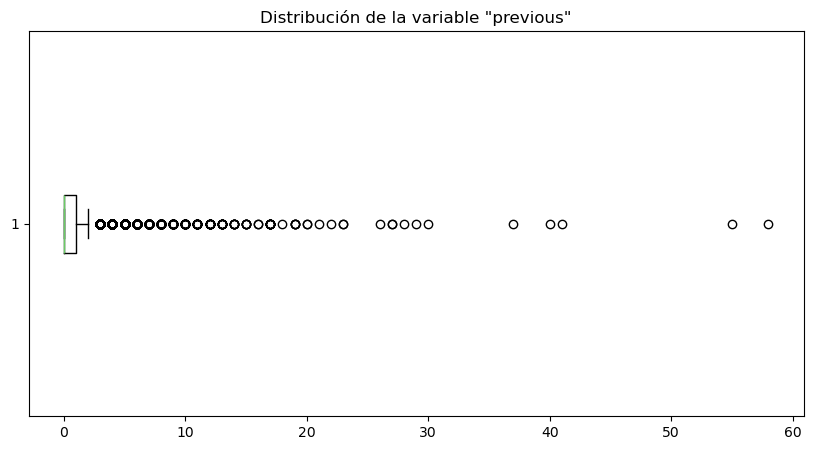

In [16]:
for column in df.select_dtypes(include=['int64']).columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[column], vert=0)
    
    plt.title(f'Distribución de la variable "{column}"')    
    plt.show()

Al representar todas las variables numéricas en un boxplot, observamos que todas (a excepción de `day`) presentan *outliers*. 

Para mi proyecto únicamente tenía pensado utilizar los datos demográficos y financieros de los clientes para predecir la contratación de depósito. Considero que eliminar directamente los valores extremos, ya sea de la edad de los clientes como del saldo que tienen en su cuenta puede sesgar el análisis. Al mantener los *outliers*, seguiría manteniendo información potencialmente valiosa sobre clientes de edad avanzada o de alto patrimonio que podrían tener necesidades diferentes en términos de productos financieros. 

Si tuviera la oportunidad, primero de todo intentaría averiguar con el departamento indicado si los valores muy extremos (por ejemplo, saldos superiores a 40.000€) se deben a un error de imputación de datos o si son correctos. Si realmente fuesen errores de entrada de datos, se podrían corregir y/o eliminar. Si son correctos, se podría crear un segundo dataframe tratando esos *outliers* y analizar si tienen gran efecto en el modelo de predicción o no. 

In [17]:
# identificación de outliers de edad, usando el método de IQR

# percentiles
Q3 = df['age'].quantile(0.75)
Q1 = df['age'].quantile(0.25)

# IQR
IQR = Q3 - Q1

# umbrales
superior = Q3 + (1.5 * IQR)
inferior = Q1 - (1.5 * IQR)
 
outliers_edad = df[(df['age'] < inferior) | (df['age'] > superior)]
outliers_edad

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1162,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
1236,85,retired,married,primary,no,12114,no,no,telephone,12,feb,165,2,-1,0,unknown,yes
1243,90,retired,divorced,secondary,no,1,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
1274,85,retired,divorced,primary,no,7613,no,no,cellular,18,feb,355,3,-1,0,unknown,yes
1320,83,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,77,retired,married,primary,no,1492,no,no,telephone,1,sep,663,1,208,2,other,no
10562,88,retired,married,primary,no,648,no,no,telephone,3,sep,318,1,-1,0,unknown,no
10570,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
10618,78,retired,married,primary,no,680,no,no,telephone,24,may,838,1,89,9,failure,no


Hay 171 clientes con edad "inusual", representando un 1.5% del total de clientes.

In [18]:
# identificación de outliers de saldo, usando el método de IQR

# percentiles
Q3 = df['balance'].quantile(0.75)
Q1 = df['balance'].quantile(0.25)

# IQR
IQR = Q3 - Q1

# umbrales
superior = Q3 + (1.5 * IQR)
inferior = Q1 - (1.5 * IQR)
 
outliers_saldo = df[(df['balance'] < inferior) | (df['balance'] > superior)]
outliers_saldo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes
60,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes
61,41,blue-collar,divorced,secondary,no,5291,yes,no,unknown,14,may,1423,3,-1,0,unknown,yes
69,44,technician,married,tertiary,no,4580,yes,no,unknown,15,may,911,2,-1,0,unknown,yes
71,29,management,married,tertiary,no,10576,no,no,unknown,15,may,1224,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
11077,54,retired,divorced,tertiary,no,6102,yes,yes,unknown,21,may,86,6,-1,0,unknown,no
11085,60,technician,married,primary,no,4243,yes,no,cellular,4,feb,387,1,251,1,failure,no
11086,42,admin.,married,secondary,no,6445,yes,no,unknown,2,jun,20,8,-1,0,unknown,no


Hay 1055 clientes con saldo "inusual", representando un 9.4% del total de clientes.

#### Winsorización

En lugar de eliminar directamente los *outliers* (ya que suponen un porcentaje considerable del total), creo un segundo dataframe y los trato con la técnica de winsorización. De esta manera, podré comprobar más adelante si tienen efecto o no en el modelo de predicción. 

In [19]:
from scipy.stats.mstats import winsorize

df_winsorized = df.copy()

# reemplazo los outliers por el valor del percentil 95 o 5 más cercano
df_winsorized['age'] = winsorize(df_winsorized['age'], limits = [0.05, 0.05], inplace = True)
df_winsorized['balance'] = winsorize(df_winsorized['balance'], limits = [0.05, 0.05], inplace = True)

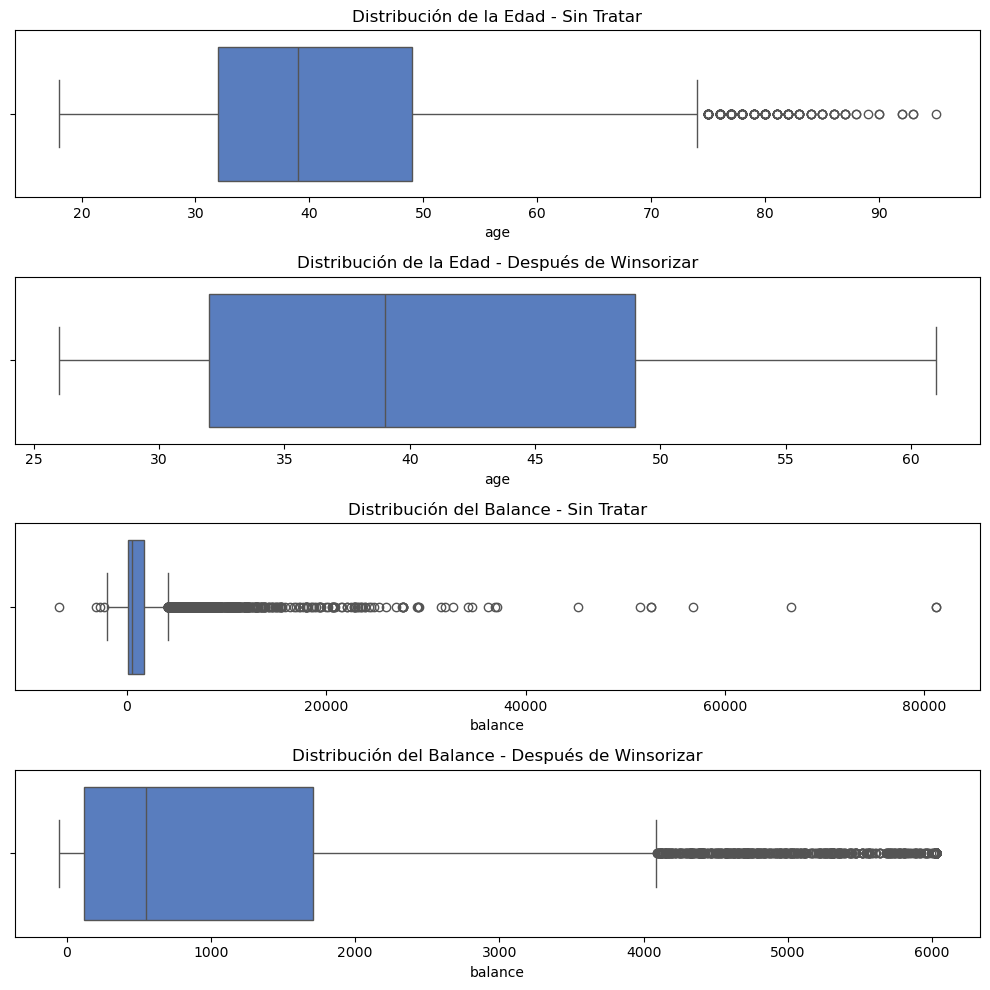

In [20]:
# creo fig y axis

fig, axes = plt.subplots(4, 1, figsize = (10, 10))

#  creo boxplot antes y despues de aplicar la winsorización
sns.boxplot(data = df, x = 'age', ax = axes[0])
sns.boxplot(data = df_winsorized, x = 'age', ax = axes[1])
sns.boxplot(data = df, x = 'balance', ax = axes[2])
sns.boxplot(data = df_winsorized, x = 'balance', ax = axes[3])

axes[0].set_title('Distribución de la Edad - Sin Tratar')
axes[1].set_title('Distribución de la Edad - Después de Winsorizar')
axes[2].set_title('Distribución del Balance - Sin Tratar')
axes[3].set_title('Distribución del Balance - Después de Winsorizar')

plt.tight_layout()

### Identificación de las características relevantes para la variable resultado (contratación o no de depósito)

#### Características numéricas más relevantes

In [21]:
# convierto las variables binarias en 0 y 1 usando map
df['default'] = df['default'].map({'no': 0, 'yes': 1}).astype(int)
df['loan'] = df['loan'].map({'no': 0, 'yes': 1}).astype(int)
df['housing'] = df['housing'].map({'no': 0, 'yes': 1}).astype(int)
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1}).astype(int)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


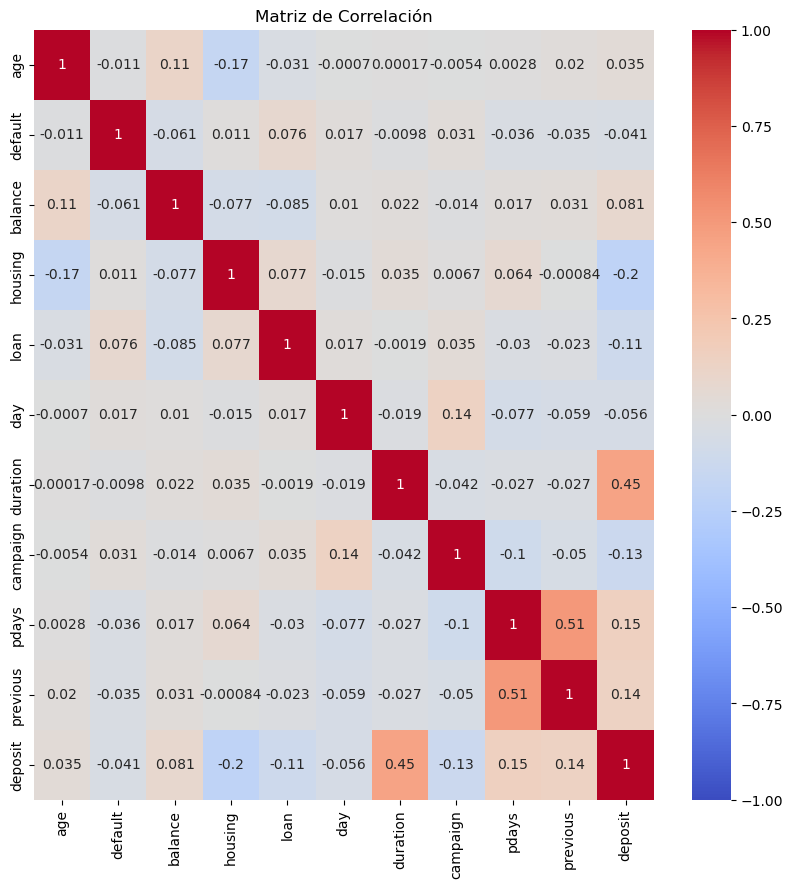

In [22]:
# calculo la matriz de correlación para variables numéricas
correlation = df.corr(numeric_only=True)

# mapa de calor de la matriz
plt.figure(figsize=(10, 10))

sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Matriz de Correlación')
plt.show()


En el mapa de calor no se observa que las variables numéricas tengan una asociación fuerte con la variable `deposit`. Las variables que me interesan para mi proyecto son `age`, `default`, `balance`, `housing` y `loan`, y no parece que haya una relación lineal fuerte con la contratación de depósito.

Aunque estas variables no estén fuertemente correlacionadas con `deposit` de forma lineal, aún pueden ser útiles para mi proyecto, ya que el modelo que he seleccionado considera relaciones no lineales entre las variables.

#### Características categóricas más relevantes

In [23]:
# convierto la variable objetivo en categórica de vuelta
df['deposit'] = df['deposit'].replace({0 : 'no', 1 : 'yes'}).astype(str)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
from scipy.stats import chi2_contingency

for column in df.select_dtypes(include=['object']).columns:
    if column != 'deposit':
        # creo la tabla de contingencia
        contingency_table = pd.crosstab(df[column], df['deposit'])
        
        # realizo la prueba chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # resultados
        print(f"\n-------------------------------------\n \
                \nVariables: '{column.upper()}' y 'DEPOSIT'\n")
        print(f"Chi2: {chi2}")
        print(f"P-value: {p}")
        print(f"Grados de libertad: {dof}")
        
        # interpretación del p-valor
        if p < 0.05:
            print(f"Existe una asociación significativa entre '{column}' y 'deposit'.")
        else:
            print(f'No se encontró una asociación significativa entre "{column}" y "deposit".')
    else:
        break


-------------------------------------
                 
Variables: 'JOB' y 'DEPOSIT'

Chi2: 378.0752558664989
P-value: 2.741689587081072e-74
Grados de libertad: 11
Existe una asociación significativa entre 'job' y 'deposit'.

-------------------------------------
                 
Variables: 'MARITAL' y 'DEPOSIT'

Chi2: 108.29928062639624
P-value: 3.0416554364237582e-24
Grados de libertad: 2
Existe una asociación significativa entre 'marital' y 'deposit'.

-------------------------------------
                 
Variables: 'EDUCATION' y 'DEPOSIT'

Chi2: 122.99190315139273
P-value: 1.7499066703782653e-26
Grados de libertad: 3
Existe una asociación significativa entre 'education' y 'deposit'.

-------------------------------------
                 
Variables: 'CONTACT' y 'DEPOSIT'

Chi2: 736.6866796046972
P-value: 1.0728032438445805e-160
Grados de libertad: 2
Existe una asociación significativa entre 'contact' y 'deposit'.

-------------------------------------
                 
Variable

En caso de las variables categóricas, todas muestran una asociación estadísticamente significativa con la variable objetivo 'deposit', y podrían ser relevantes como características predictivas. En mi proyecto utilizaré las variables: `job`,`marital` y `education`.

### Detección y gestión del desbalance de clases

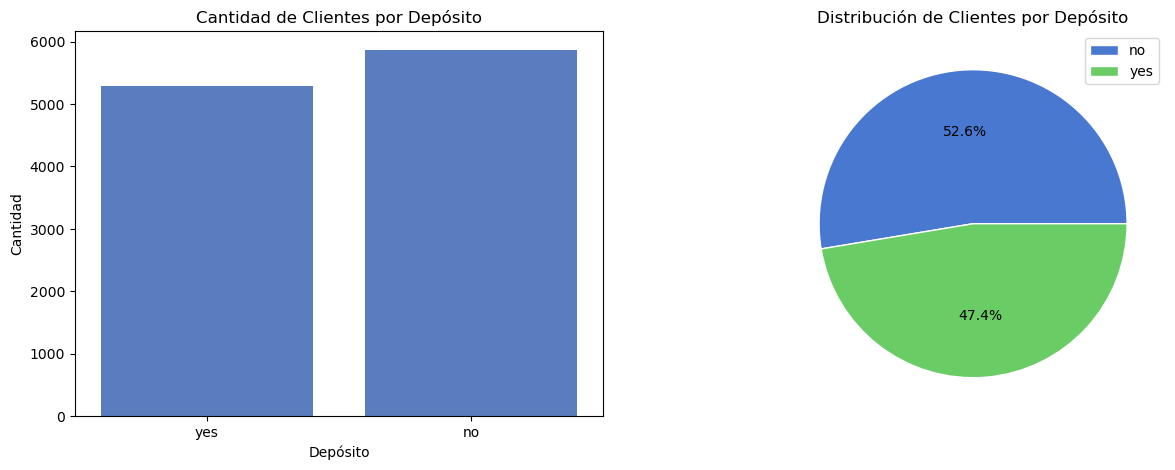

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# cantidad de clientes que contrataron o no el depósito
sns.countplot(data=df, x='deposit', ax=ax1)

ax1.set_title('Cantidad de Clientes por Depósito')
ax1.set_xlabel('Depósito')
ax1.set_ylabel('Cantidad')

# porcentaje de clientes que contrataron o no el depósito
categoria_count = df['deposit'].value_counts() 

ax2.pie(categoria_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

ax2.set_title('Distribución de Clientes por Depósito')
ax2.legend(categoria_count.index)

plt.show()

La distribución entre clases de la variables que se quiere predecir es bastante uniforme.

# EDA automático con Sweetviz

In [26]:
# realizo el análisis automático con Sweetviz para ver qué información nos ofrece
report = sv.analyze(df)
report.show_html('EDA_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Conclusiones

Durante mi análisis exploratorio de datos (EDA), trabajé con un conjunto de datos que contenía 11162 filas y 17 columnas. Observé que había una gran dispersión en algunas variables numéricas y también encontré 22 valores *null* en las columnas de edad, estado civil y educación. Para abordar los valores faltantes, decidí imputar esos valores usando la mediana y la moda de grupos relacionados. Además, noté que había *outliers* en casi todas las variables numéricas. En lugar de eliminarlos, opté por aplicar la técnica de winsorización, ya que estos *outliers* podrían ofrecer información valiosa sobre clientes con características inusuales.

Al explorar las correlaciones, me di cuenta de que, aunque las variables numéricas no mostraban una relación fuerte con la variable objetivo (depósito), el modelo que elegí podría captar relaciones no lineales, lo que justifica incluir variables como la edad, el estado de morosidad, el balance, la hipoteca y los préstamos. Por otro lado, las variables categóricas mostraron asociaciones significativas con el depósito, lo que resaltó la relevancia de variables como el trabajo, el estado civil y la educación como características predictivas. Finalmente, noté que la distribución de clases en la variable de depósito era bastante uniforme, así que decidí no hacer ajustes.